# digits

## 1) 필요한 모듈 import 하기

In [1]:
# 데이터 불러오는 모듈
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 결과 출력할 때 사용할 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt

# 평가지표
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 기타
from collections import Counter

## 2) 데이터준비digits

In [2]:
digits = load_digits()

## 3) 데이터 이해하기
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

(64,)
(8, 8)


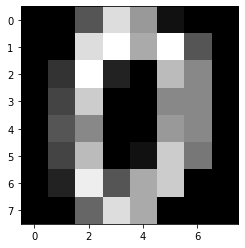

In [3]:
# 이전에 학습을 할때는 digits의 data를 사용했지만 
# images에 대한 정보도 있어서 확인해보았다.
# data -> 64 / images -> 8x8
print(digits.data[0].shape)
print(digits.images[0].shape)
plt.imshow(digits.images[0], cmap='gray')
plt.show()

In [4]:
# Feature, Label Data 지정
digits_data = digits.data
digits_label = digits.target

# 이후에 split을 사용할 때 random하게 바뀌는지 확인하기 위해 확인
# 0~9까지 10개를 기준으로 반복되고 있는 것을 볼 수 있다.
print(digits_label[:20])

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [5]:
# target names 출력해보기
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- label의 데이터는 0 ~ 9까지 10개를 기준으로 반복되고 있다.
 - 이후에 ```train_test_split```을 사용할 때 반드시 random하게 바꿔주도록 한다.  
- target_names, 즉 분류해야할 10개의 클래스의 이름은 0 ~ 9까지의 숫자를 나타내고 있다는 것을 알 수 있다.

In [6]:
# 데이터 Describe 해 보기
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## 4) train, test 데이터 분리

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   random_state=7,
                                                   test_size=0.2)

# 랜덤시드를 줌으로써 기존에 0~9 순서였던 것이 랜덤하게 바뀌었다.
print(y_train[:20])

[2 2 2 4 7 6 6 9 1 5 9 9 2 9 0 7 0 9 6 1]


##  5) 다양한 모델로 학습시켜보기

### 함수 만들기
- 반복되는 모델 선택, 학습 및 예측하는 과정을 ```process```라는 이름의 함수로 만들었다.
<br><br>
- 입력 받는 인자는 다음과 같다
 - model_name
     1. ```Decision_tree```
     2. ```Random_Forest```
     3. ```SVM```
     4. ```SGD_Gradient```
     5. ```Logistic_Regression```
 - train_data, test_data
 - metrics
     1. ```accuracy```
     2. ```recall```
     3. ```f1_score```
<br><br>
- 3가지의 값을 반환한다.
 1. ```score```
 2. ```cf_matfix```
 3. ```report```

In [8]:
# 모든 모델에 대해서 다음 5개의 모델을 확인할 것이기 때문에 리스트로 이름을 저장해두었다.
models = ['Decision_Tree', 'Random_Forest', 'SVM', 'SGD_Gradient', 'Logistic_Regression']

In [9]:
def process(model_name, X_train, y_train, X_test, y_test, metrics='accuracy'):
    # 모델 분기문
    if model_name == "Decision_Tree":
        model = DecisionTreeClassifier(random_state=32)
    elif model_name == "Random_Forest":
        model = RandomForestClassifier()
    elif model_name == "SVM":
        model = SVC()
    elif model_name == "SGD_Gradient":
        model = SGDClassifier()
    elif model_name == "Logistic_Regression":
        model = LogisticRegression(max_iter=1000000)
    else :
        print("Wrong Model Name")
        return;
    
    # 학습 및 예측
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 평가지표 분기문
    if metrics == 'accuracy' :
        score = accuracy_score(y_test, y_pred)
    elif metrics == 'recall':
        score = recall_score(y_test, y_pred)
    elif metrics == 'f1_score':
        score = f1_score(y_test, y_pred, average='macro')
        
    # confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    # classification_report
    report = classification_report(y_test, y_pred)
    
    return score, cf_matrix, report, metrics

### 모델별로 지표 확인
- 손글씨의 경우 지표는 **Accuracy**로 설정

In [10]:
# 가장 높은 점수를 내는 모델을 확인하기 위한 dict
result_dict = {}

for i in models:
    score, cf_matrix, report, metrics = process(i, X_train, y_train, X_test, y_test)
    result_dict[i] = score
    print("{:>19} -> score : {:.3f}".format(i, score))

# score를 model을 키값으로 dict에 저장
highest, score = sorted(result_dict.items(), key = lambda x : x[1], reverse=True)[0]
print('')
print("평가지표 : {}\nscore가 가장 높은 모델 : {}, score : {:.3f}".format(metrics, highest, score))

      Decision_Tree -> score : 0.856
      Random_Forest -> score : 0.964
                SVM -> score : 0.989
       SGD_Gradient -> score : 0.947
Logistic_Regression -> score : 0.953

평가지표 : accuracy
score가 가장 높은 모델 : SVM, score : 0.989


# Wine

## 1) 라이브러리 import

In [11]:
from sklearn.datasets import load_wine

## 2) 데이터준비 wine

In [12]:
wines = load_wine()

## 3) 데이터 이해하기
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

In [13]:
# Feature, Label Data 지정
wines_data = wines.data
wines_label = wines.target

# 이후에 split을 사용할 때 random하게 바뀌는지 확인하기 위해
# 먼저 찍어본다
print(wines_label[:20])
print(wines_label[int(len(wines_label)*0.3):int(len(wines_label)*0.3)+20])
print(wines_label[len(wines_label)-20:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


- label의 데이터가 앞부분부터 0이 반복되고 그 다음은 1, 2 가 연속되게 나오는 것을 확인할 수 있다.
- ```train_test_split``` 할 때, 섞어야한다.

- 입력받은 와인의 정보들로 총 3가지의 와인을 판별해야 하는 문제이다.

In [14]:
# target names 출력해보기
wines.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

- target별 데이터수

In [15]:
for key, value in Counter(wines.target).items():
    print("{} : {}".format(wines.target_names[key], value))

class_0 : 59
class_1 : 71
class_2 : 48


In [16]:
# 데이터 Describe 해 보기
print(wines.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 4) train, test 데이터 분리

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wines_data,
                                                   wines_label,
                                                   random_state=7,
                                                   test_size=0.2,
                                                   stratify=wines_label)

# 랜덤시드를 줌으로써 기존에 연속적인 0, 1, 2를 섞어주었다.
print(y_train[:20])

[2 1 1 1 2 1 2 0 0 1 1 1 1 2 0 2 0 1 0 0]


## 5) 학습 및 평가, 지표설정
- wine의 입력받는 다양한 특징 중에서 매 단계마다 몇가지 특성만 랜덤하게 골라서 예측하는 **Random Forest** 방식이 적합할 것으로 예상했다.
- 와인의 종류를 단순히 맞추기만 하는 것으로 평가지표는 **Accuracy**로 결정했다.

In [18]:
for i in models:
    score, cf_matrix, report, metrics = process(i, X_train, y_train, X_test, y_test)
    result_dict[i] = score
    print("{:>19} -> score : {:.3f}".format(i, score))

highest, score = sorted(result_dict.items(), key = lambda x : x[1], reverse=True)[0]
print('')
print("평가지표 : {}\nscore가 가장 높은 모델 : {}, score : {:.3f}".format(metrics, highest, score))

      Decision_Tree -> score : 0.944
      Random_Forest -> score : 0.972
                SVM -> score : 0.639
       SGD_Gradient -> score : 0.500
Logistic_Regression -> score : 0.917

평가지표 : accuracy
score가 가장 높은 모델 : Random_Forest, score : 0.972


# Breast Cancer

## 1) 라이브러리 import

In [19]:
from sklearn.datasets import load_breast_cancer

## 2) 데이터준비 wine

In [20]:
bcs = load_breast_cancer()

## 3) 데이터 이해하기
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

In [21]:
# Feature, Label Data 지정
bcs_data = bcs.data
bcs_label = bcs.target

# 이후에 split을 사용할 때 random하게 바뀌는지 확인하기 위해
# 먼저 찍어본다
print(bcs_label[:30])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


In [22]:
# target names 출력해보기
bcs.target_names

array(['malignant', 'benign'], dtype='<U9')

구분해야 하는 target(label)은 악성과 양성이다.

In [23]:
# 데이터 Describe 해 보기
print(bcs.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## 4) train, test 데이터 분리

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bcs_data,
                                                   bcs_label,
                                                   random_state=7,
                                                   test_size=0.2)

# 연속되어 있는 label은 아니였지만 그래도 random_state의 값을 주어서 label 데이터를 섞어주었다.
print(y_train[:20])

[0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1]


## 5) 학습 및 평가, 지표설정
- 암이 악성일 경우를 Positive, 암이 양성일 경우를 Negative라고 생각해본다.
- 양성 암을 악성이라고 하는 것은 괜찮지만 악성 암을 양성이라고 판단하면 매우 위험해진다.
- 그렇기 때문에 지표는 **Recall**, 혹은 **F1 Score**가 적합하다고 판단하였다.

### Recall? F1 score?
- F1 score는 주로 label이 불균형 구조일 때, 모델의 성능을 정확하게 평가할 수 있다.
- 그렇다면 label의 비중을 확인해본다.
 - ```collections```의 ```Counter``` 활용

In [25]:
from collections import Counter

for key, value in Counter(bcs.target).items():
    print("{:>9} : {}개".format(bcs.target_names[key], value))

malignant : 212개
   benign : 357개


- 확인 결과 악성 212개와 양성 357개로 구성되어 있는 것을 확인할 수 있다.
- 비록 차이는 많이 안크지만 데이터셋 자체가 비교적으로 작기 때문에 **F1 Score**를 사용할 것이다.
- 추가적으로 결과로는 Confusion matrix를 출력해주도록 한다.

### 모델별로 score, confusion matrix시각화

      Decision_Tree -> score : 0.901
      Random_Forest -> score : 0.971
                SVM -> score : 0.886
       SGD_Gradient -> score : 0.889
Logistic_Regression -> score : 0.940

평가지표 : f1_score
score가 가장 높은 모델 : Random_Forest, score : 0.971
------------------------------------------------------
                    Decision_Tree                     
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

- - - - - - - - - - - - - - - - - - - - - - - - - - - 
                    Random_Forest                     
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.96      1.00      0.98        74

    accuracy                           0

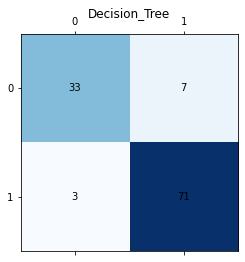

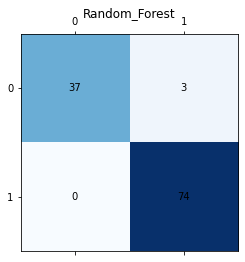

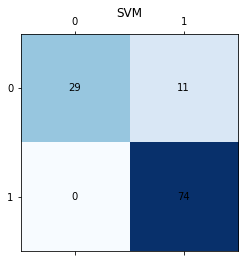

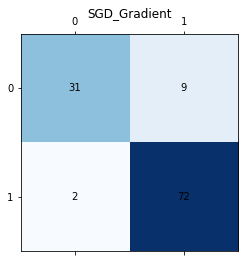

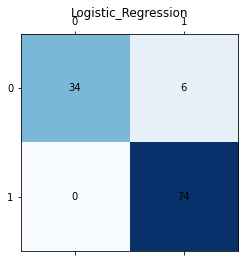

In [26]:
reports = {}
for i in models:
    score, cf_matrix, report, metrics = process(i, X_train, y_train, X_test, y_test, metrics="f1_score")
    result_dict[i] = score
    reports[i] = report
    print("{:>19} -> score : {:.3f}".format(i, score))
    
    fig, ax = plt.subplots()
    ax.matshow(cf_matrix, cmap=plt.cm.Blues)
    
    for x in range(2) :
        for y in range(2) :
            c = cf_matrix[y, x]
            ax.set_title(i)
            ax.text(x, y, str(c), va='center', ha='center')
    
    

highest, score = sorted(result_dict.items(), key = lambda x : x[1], reverse=True)[0]
print('')
print("평가지표 : {}\nscore가 가장 높은 모델 : {}, score : {:.3f}".format(metrics, highest, score))
print('-'*54)
for key, values in reports.items():
    print("{:^54}".format(key))
    print(values)
    print('- '*27)

# 정리 

#### 3가지의 데이터셋을 사용해서 각각 다양한 모델로 분류를 해보았다.
<br>

##### 1. 손글씨 데이터
 - 손글씨의 경우는 8x8의 사이즈, 총 64개의 픽셀에 대한 정보들이 입력으로 들어간다. 그리고 target(label)에 대한 정보는 각 손글씨가 0~9까지의 숫자중 어느 숫자인지 알려준다.
 - 손글씨를 보고 단순하게 어느 숫자인지 판별하는 것이기 때문에 **accuracy**를 사용하는 것이 맞다고 판단하였다.
 - 64개의 픽셀의 정보가 들어가지만 한 픽셀에 대한 정보가 특별하게 숫자를 나타내는데 정보가 되지 않다고 생각했고, 그러한 점에서 입력되는 정보가 많아도 Random Forest는 적합하지 않다고 생각하였다.
 - 그래서 각 모델의 accuracy만 확인해보았고 전체적으로 높은 대신에 Decision Tree가 가장 낮고 **SVM**이 가장 높은 점수가 나오는 것을 확인할 수 있었다.

##### 2. 와인 데이터
 - 와인에 관련된 feature는 13개, 분류해야할 target(label)의 수는 3개이다.
 - 여기서는 13개의 와인에 대한 다양한 요소들을 사용해서 3가지의 종류 중에서 한가지를 맞춰야 한다.
 - 평가지표는 **accuracy**로 정하였다. 와인의 경우 단순하게 3개의 target중에서 맞추느냐 안맞추느냐의 문제로만 생각을 하였다.
 - 하지만 여기서 모델은 1번의 손글씨와는 다르게 다양한 feature의 정보 중에서 무작위로 선정하고, 매 단계마다 선정한 요소들로 어느 클래스에 속하는 와인인지 예측하고, 매 단계마다 반복해서 예측과정을 수행하는 **Random Forest**의 모델을 썼을 때 보다 정확한 Score가 나왔다.<br>

##### 3. 유방암 데이터
 - 유방암의 경우는 feature의 수도 30개, target(label)은 2개이다.
 - 암의 경우에서는 confusion matrix를 참고하여 평가지표를 정하기로 했다.
 - 암이 있는 경우를 Positive, 없는 경우를 Negative로 했을 때,
     암이 실제로 없을 때, 있다고 예측하는 것은 상관이 없다. (FP)
     하지만 암이 있을 때, 없다고 예측하는 것은 매우 위험한 경우이다. (FN)
 - 그렇기 때문에 평가지표는 Recall, 혹은 F1 score로 설정하였다.
 - 추가적으로 유방암 데이터의 label 비율이 정확하게 같지는 않기 때문에 아무래도 불균형 구조일때 좀더 정확한 점수를 내는 **f1_score**가 적합하다고 생각했다.